<a href="https://colab.research.google.com/github/yael-vinker/CLIPasso/blob/main/CLIPasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CLIPasso: Semantically-Aware Object Sketching

Note that the colab version is slower.
For faster sketching with multiprocessing please refer to the github repository and follow the running instructions.


**Define your target image**<br>
You can upload your own target image to sketch, please place it under "CLIPasso/target_images/".



## (1) Install Dependencies and Clone the Repo

This stage might take a few minutes

*   Make sure your Hardware accelerator is set to GPU: Runtime > Change runtime type > Hardware Accelerator 
*   Make sure to restart the runtime after this stage is done





In [1]:
%cd /usr/local/
!pwd
!ls
!rm -rf cuda
!ln -s /usr/local/cuda-10.1 /usr/local/cuda
!stat cuda
!nvcc --version

%cd /content/
!git clone https://github.com/yael-vinker/CLIPasso.git
%cd CLIPasso
!pip install -r requirements.txt
!pip install torch==1.7.1+cu101 torchvision==0.8.2+cu101 -f https://download.pytorch.org/whl/torch_stable.html



/usr/local
/usr/local
bin	   cuda-11    games		  LICENSE.txt  setup.cfg
cuda	   cuda-11.0  _gcs_config_ops.so  licensing    share
cuda-10.0  cuda-11.1  include		  man	       src
cuda-10.1  etc	      lib		  sbin	       xgboost
  File: cuda -> /usr/local/cuda-10.1
  Size: 20        	Blocks: 0          IO Block: 4096   symbolic link
Device: 24h/36d	Inode: 96          Links: 1
Access: (0777/lrwxrwxrwx)  Uid: (    0/    root)   Gid: (    0/    root)
Access: 2022-02-11 11:34:14.381717146 +0000
Modify: 2022-02-11 11:34:14.276716774 +0000
Change: 2022-02-11 11:34:14.276716774 +0000
 Birth: -
nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2019 NVIDIA Corporation
Built on Sun_Jul_28_19:07:16_PDT_2019
Cuda compilation tools, release 10.1, V10.1.243
/content
Cloning into 'CLIPasso'...
remote: Enumerating objects: 255, done.
remote: Counting objects: 100% (255/255), done.
remote: Compressing objects: 100% (194/194), done.
remote: Total 255 (delta 126), reused 115 (delta 48), pack-reused 0

Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |████████████████████████████████| 735.4 MB 16 kB/s 
     |████████████████████████████████| 12.8 MB 18.7 MB/s 
  Attempting uninstall: torch
    Found existing installation: torch 1.7.1
    Uninstalling torch-1.7.1:
      Successfully uninstalled torch-1.7.1
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.8.2
    Uninstalling torchvision-0.8.2:
      Successfully uninstalled torchvision-0.8.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.11.0 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.
torchaudio 0.10.0+cu111 requires torch==1.10.0, but you have torch 1.7.1+cu101 which is incompatible.


In [ ]:
%cd /content/CLIPasso
!git pull

In [1]:
%cd /content/CLIPasso
!pip install git+https://github.com/openai/CLIP.git
!git clone https://github.com/BachiLi/diffvg
%cd diffvg
!git submodule update --init --recursive
!python setup.py install

/content/CLIPasso
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-ncwnl00u
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-ncwnl00u
  Resolved https://github.com/openai/CLIP.git to commit 40f5484c1c74edd83cb9cf687c6ab92b28d8b656
  Created wheel for clip: filename=clip-1.0-py3-none-any.whl size=1369221 sha256=2d26fdaca0bc96ab26d86d2b41ae75e029751793ad1e080f7632ed6e6ce4bada
  Stored in directory: /tmp/pip-ephem-wheel-cache-plqlk52x/wheels/fd/b9/c3/5b4470e35ed76e174bff77c92f91da82098d5e35fd5bc8cdac
Successfully built clip
Cloning into 'diffvg'...
remote: Enumerating objects: 279, done.
remote: Total 279 (delta 0), reused 0 (delta 0), pack-reused 279
Receiving objects: 100% (279/279), 10.27 MiB | 18.54 MiB/s, done.
Resolving deltas: 100% (105/105), done.
/content/CLIPasso/diffvg
Submodule 'pybind11' (https://github.com/pybind/pybind11.git) registered for path 'pybind11'
Submodule 'thrust' (https://github.com/thrust/thrust.git) registe

# (2) Start Sketching 🎨

This stage will take a few minutes.

We provide a few input examples under "CLIPasso/target_images". 
<br>You can sketch your own input by simply placing the desired image in "CLIPasso/target_images" and specifying the image name under "target_image".

**A few notes:**<br>

*   It is recommended to use images without a background, however, if your image contains a background, you can mask it out by using inserting 1 to "**mask_object**" field below.
*   If your image is not squared, it might be cut off. In that case it is recommended to fill the "**fix_scale**" field with 1 to automatically fix the scale.
*   You can define the abstraction level by using the "**num_strokes**" parameter. This parameter defines the number of strokes used to create the sketch. For example, optional values can be 32, 16, 8 and even 4.

You can download the resulting sketch in SVG format from CLIPasso/output_sketches/\<target_image_name\>/best_iter.svg

/content/CLIPasso


Downloading...
From: https://drive.google.com/uc?id=1ao1ovG1Qtx4b7EoskHXmi2E9rp5CHLcZ
To: /content/CLIPasso/U2Net_/saved_models/u2net.pth
 91%|█████████ | 160M/176M [00:01<00:00, 121MB/s]

Processing [camel.png] ...


100%|██████████| 176M/176M [00:01<00:00, 122MB/s]


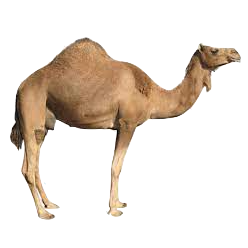

Results will be saved to 
[/content/CLIPasso/output_sketches/camel/] ...
GPU: True


Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:03<00:00, 147MB/s]
100%|████████████████████████████████████████| 338M/338M [00:02<00:00, 148MiB/s]
100%|███████████████████████████████████████| 278M/278M [00:11<00:00, 24.8MiB/s]
100%|██████████| 2001/2001 [26:20<00:00,  1.27it/s]


In [2]:
%cd /content/CLIPasso
!git pull

%matplotlib inline
target_image = "camel.png" #@param {"type": "string"}
mask_object = 0 #@param {"type": "integer"}
fix_scale = 0 #@param {"type": "integer"}
num_strokes = 16 #@param {"type": "integer"}

%run run_object_sketching.py --target_file $target_image --num_sketches 1 -colab --mask_object $mask_object --fix_scale $fix_scale --num_strokes $num_strokes

# (3) Display Results

/content/CLIPasso
Updating 9a52b25..d5837be
error: Your local changes to the following files would be overwritten by merge:
	display_results.py
Please commit your changes or stash them before you merge.
Aborting
['camel_16strokes_seed0', 'camel_16strokes_seed0_best.svg']


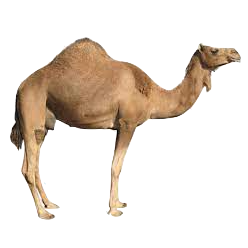

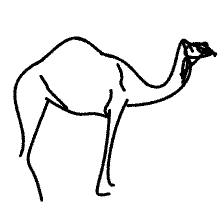

/content/CLIPasso/output_sketches/camel/camel_16strokes_seed0


In [5]:
%cd /content/CLIPasso/
!git pull

target_image = "camel.png" #@param {"type": "string"}
%run display_results.py --target_file $target_image

In [10]:
%cd /content/CLIPasso/

import re
import os
import subprocess as sp
import moviepy.editor as mvp
from IPython.display import clear_output

target_image = "camel.png" #@param {"type": "string"}

abs_path = os.path.abspath(os.getcwd())
result_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}"
svg_files = os.listdir(result_path)
svg_files = [f for f in svg_files if "best.svg" in f]

p = re.compile("_best")
best_sketch_dir = ""
for m in p.finditer(svg_files[0]):
    best_sketch_dir += svg_files[0][0: m.start()]

cur_path = f"{abs_path}/output_sketches/{os.path.splitext(target_image)[0]}/{best_sketch_dir}"
sp.run(["ffmpeg", "-y", "-framerate", "10", "-pattern_type", "glob", "-i", 
            f"{cur_path}/svg_to_png/iter_*.png", "-vb", "20M", f"{cur_path}/sketch.mp4"])

sp.run(["ffmpeg", "-y", "-i", f"{cur_path}/sketch.mp4", "-filter_complex",
    "[0]trim=0:2[hold];[0][hold]concat[extended];[extended][0]overlay",
    f"{cur_path}/sketch_longer.mp4"])

clear_output()
display(mvp.ipython_display(f"{cur_path}/sketch_longer.mp4"))